In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [313]:
#load data
pdata = pd.read_csv("concrete.csv")

In [314]:
pdata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [315]:
#Check shape
pdata.shape

(1030, 9)

In [316]:
#check column names
pdata.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [317]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [318]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [319]:
# check for null values

In [320]:
pdata.isnull().values.any()

False

In [321]:
missingValue = pdata.isnull().sum()
print(missingValue)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [322]:
# No missing values

In [323]:
# checking for value 0

In [324]:
pdata[pdata['slag']==0].count()

cement          471
slag            471
ash             471
water           471
superplastic    471
coarseagg       471
fineagg         471
age             471
strength        471
dtype: int64

In [325]:
## 471 entries where slag is 0

In [326]:
pdata[pdata['ash']==0].count()

cement          566
slag            566
ash             566
water           566
superplastic    566
coarseagg       566
fineagg         566
age             566
strength        566
dtype: int64

In [327]:
#566 records where ash is 0

In [328]:
pdata[pdata['superplastic']==0].count()

cement          379
slag            379
ash             379
water           379
superplastic    379
coarseagg       379
fineagg         379
age             379
strength        379
dtype: int64

In [329]:
#379 records where superplastic is 0

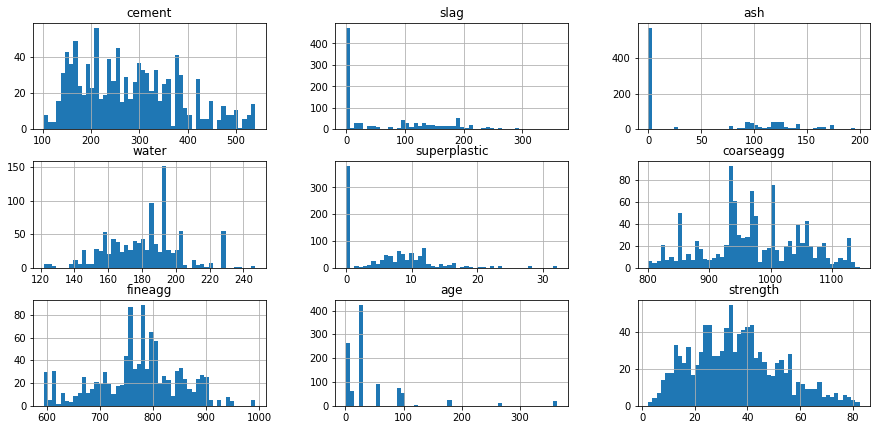

In [330]:
pdata.hist(stacked=True, bins=50, figsize=(15,35), layout=(14,3));

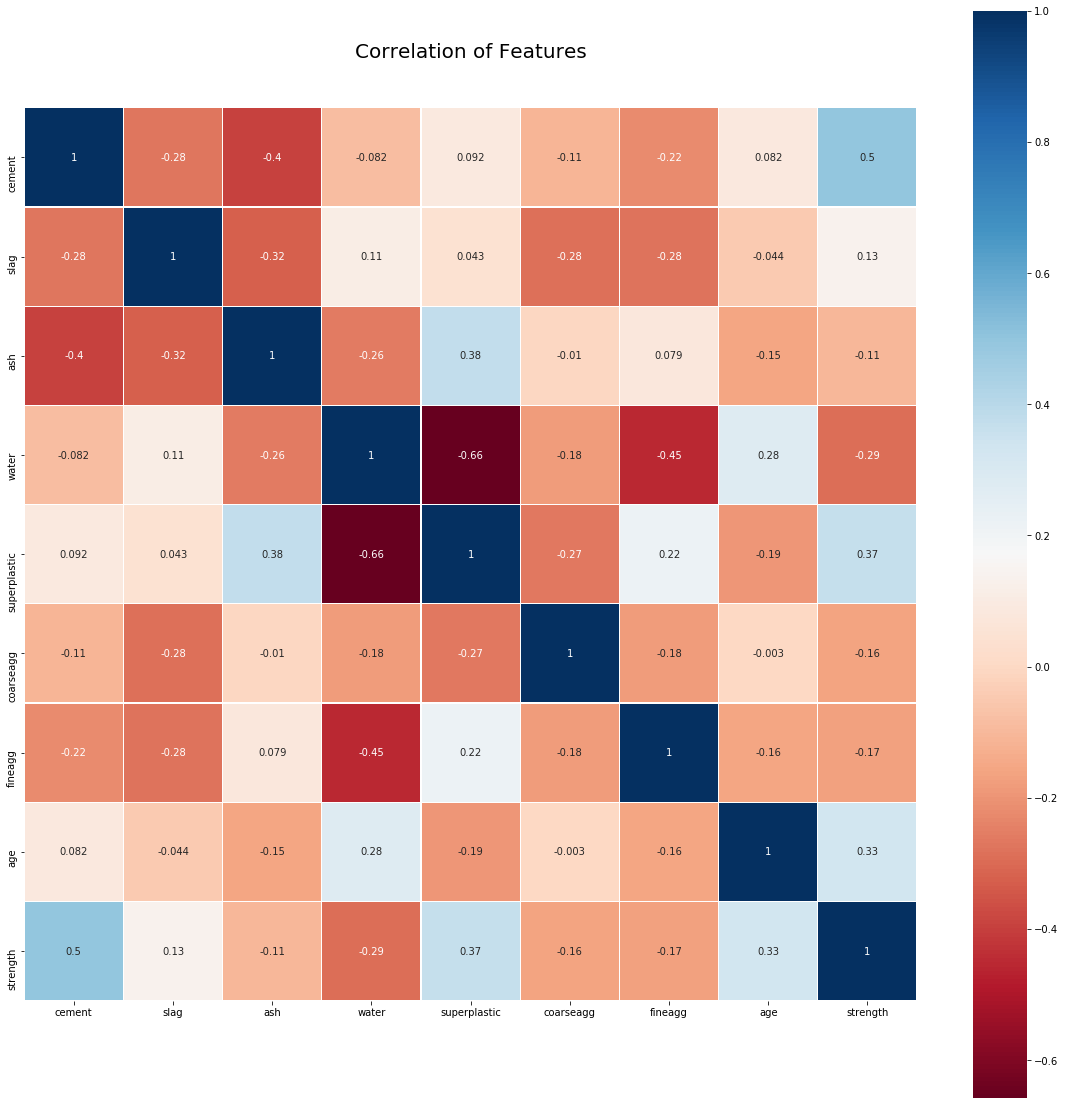

In [331]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(pdata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [332]:
# not much of correlation exists between the variables
#cement is the main factor for cement strength

In [333]:
#Pair plot to check density

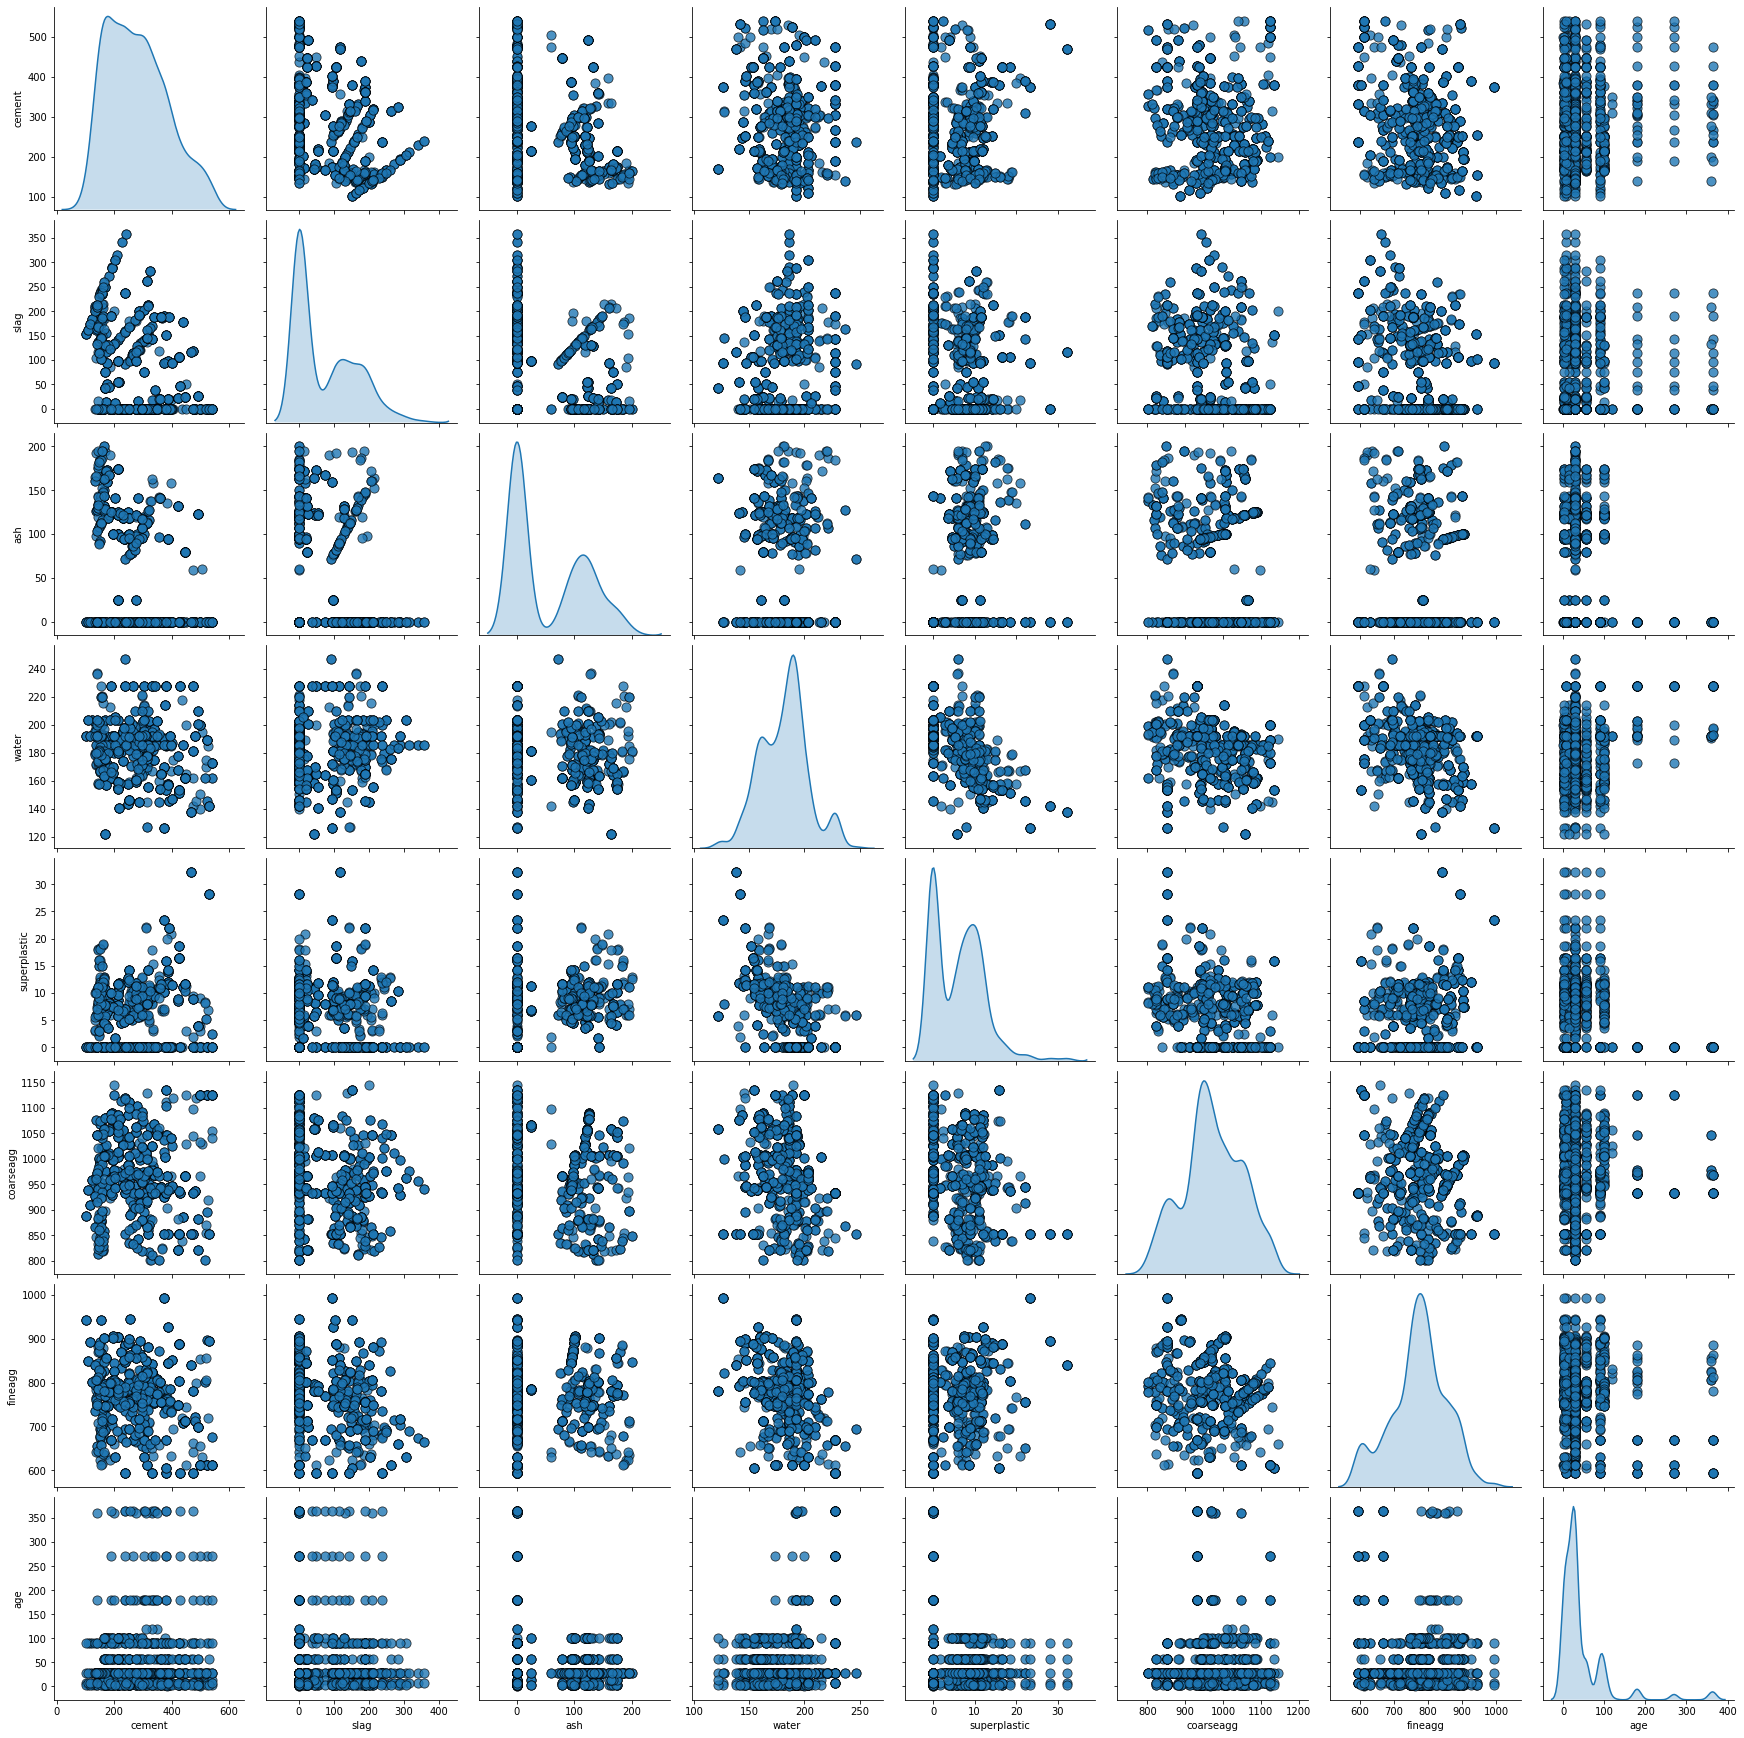

In [334]:
sns.pairplot(pdata, 
             vars = ['cement', 'slag', 'ash', 'water','superplastic','coarseagg','fineagg','age'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

In [335]:
#slag, ash and superplastic has distorted gaussian 

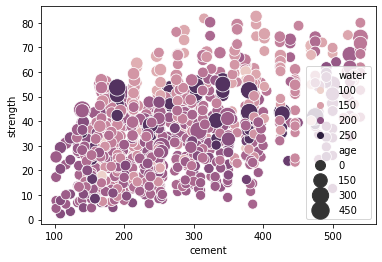

In [336]:
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=pdata, sizes=(100, 300))

In [337]:
#Strength increases as the quantity of cement increases

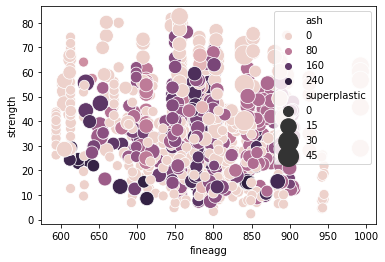

In [338]:
sns.scatterplot(y="strength", x="fineagg", hue="ash",
   size="superplastic", data=pdata, sizes=(100, 400))

In [339]:
# ASH is higher in the region where the strength is lower. 

In [340]:
# Let's check outliers using box plot

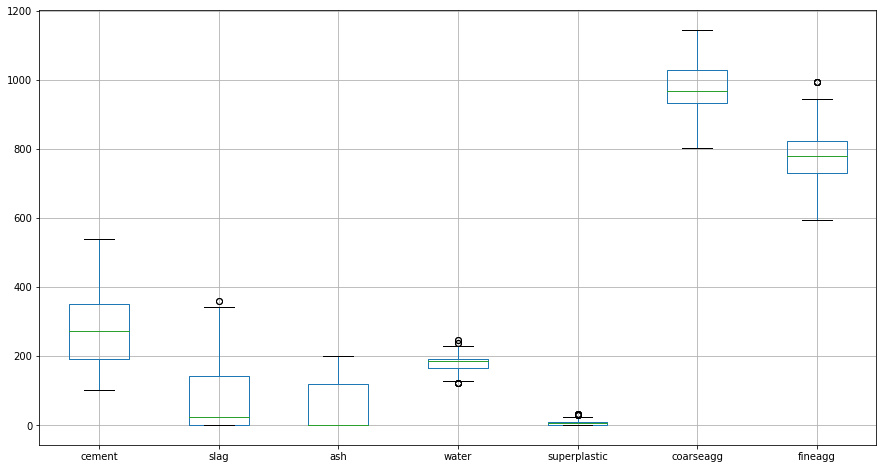

In [341]:
plt.figure(figsize=(15 , 8))
pdata.boxplot(column=['cement', 'slag', 'ash', 'water','superplastic','coarseagg','fineagg'])

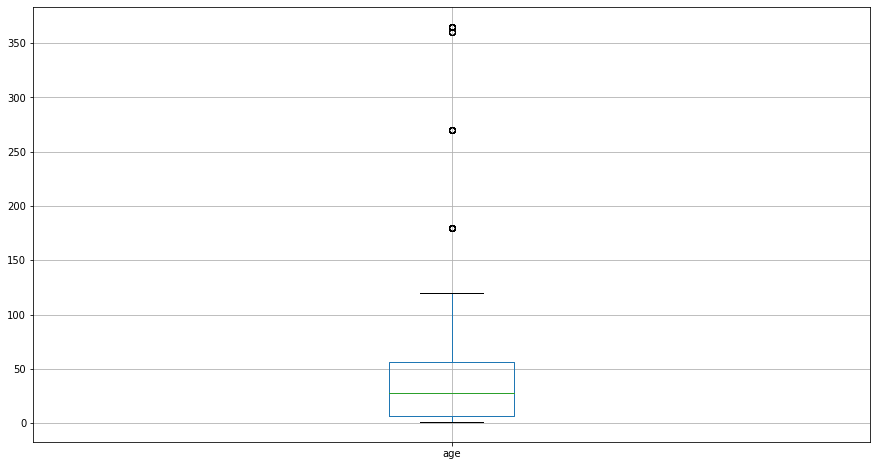

In [342]:
plt.figure(figsize=(15 , 8))
pdata.boxplot(column=['age'])

In [343]:
# slag, water, superplastic and fineagg has outliers

In [344]:
# Setting outlier value within IQR range for slag

In [345]:
Q1 = pdata['slag'].quantile(0.25)
Q3 = pdata['slag'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3 + 1.5 * IQR)
print(IQR)

0.0
357.375
142.95


In [346]:
pdata[((pdata['slag'] < (Q1 - 1.5 * IQR)) )]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [347]:
pdata[((pdata['slag'] > (Q3 + 1.5 * IQR)) )]  

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [348]:
pdata.loc[pdata['slag'] > (Q3 + 1.5 * IQR), ["slag"]] = (Q3 + 1.5 * IQR)

In [349]:
# Setting outlier value within IQR range for water

In [350]:
Q1 = pdata['water'].quantile(0.25)
Q3 = pdata['water'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3 + 1.5 * IQR)
print(IQR)

164.9
232.64999999999998
27.099999999999994


In [351]:
pdata[((pdata['water'] < (Q1 - 1.5 * IQR)) )]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [352]:
pdata[((pdata['water'] > (Q3 + 1.5 * IQR)) )] 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [353]:
pdata.loc[pdata['water'] < (Q1 - 1.5 * IQR), ["water"]] = (Q1 - 1.5 * IQR)

In [354]:
pdata.loc[pdata['water'] > (Q3 + 1.5 * IQR), ["water"]] = (Q3 + 1.5 * IQR)

In [355]:
# Setting outlier value within IQR range for superplastic

In [356]:
Q1 = pdata['superplastic'].quantile(0.25)
Q3 = pdata['superplastic'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3 + 1.5 * IQR)
print(IQR)

0.0
25.5
10.2


In [357]:
pdata[((pdata['superplastic'] < (Q1 - 1.5 * IQR)) )]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [358]:
pdata[((pdata['superplastic'] > (Q3 + 1.5 * IQR)) )] 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [359]:
pdata.loc[pdata['superplastic'] < (Q1 - 1.5 * IQR), ["superplastic"]] = (Q1 - 1.5 * IQR)

In [360]:
pdata.loc[pdata['superplastic'] > (Q3 + 1.5 * IQR), ["superplastic"]] = (Q3 + 1.5 * IQR)

In [361]:
# Setting outlier value within IQR range for fineagg

In [362]:
Q1 = pdata['fineagg'].quantile(0.25)
Q3 = pdata['fineagg'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3 + 1.5 * IQR)
print(IQR)

730.9499999999999
963.575
93.05000000000007


In [363]:
pdata[((pdata['fineagg'] < (Q1 - 1.5 * IQR)) )]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [364]:
pdata[((pdata['fineagg'] > (Q3 + 1.5 * IQR)) )] 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


In [365]:
pdata.loc[pdata['fineagg'] < (Q1 - 1.5 * IQR), ["fineagg"]] = (Q1 - 1.5 * IQR)

In [366]:
pdata.loc[pdata['fineagg'] > (Q3 + 1.5 * IQR), ["fineagg"]] = (Q3 + 1.5 * IQR)

In [367]:
# Box plot after adjusting outliers

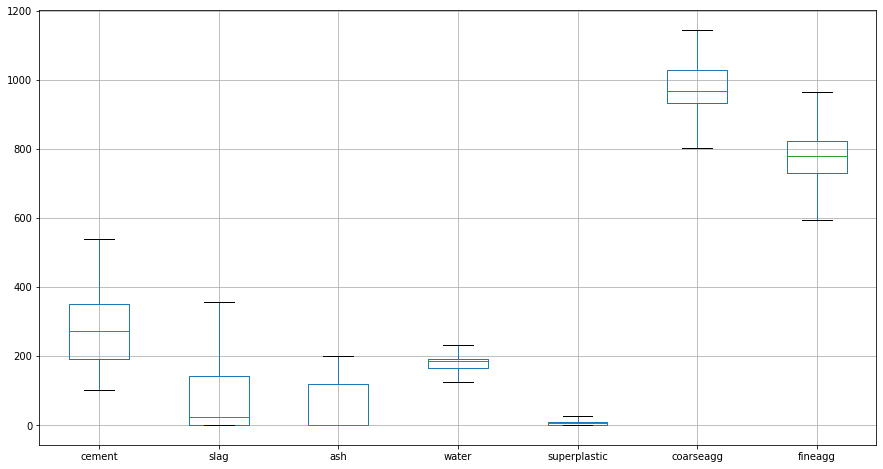

In [368]:
plt.figure(figsize=(15 , 8))
pdata.boxplot(column=['cement', 'slag', 'ash', 'water','superplastic','coarseagg','fineagg'])

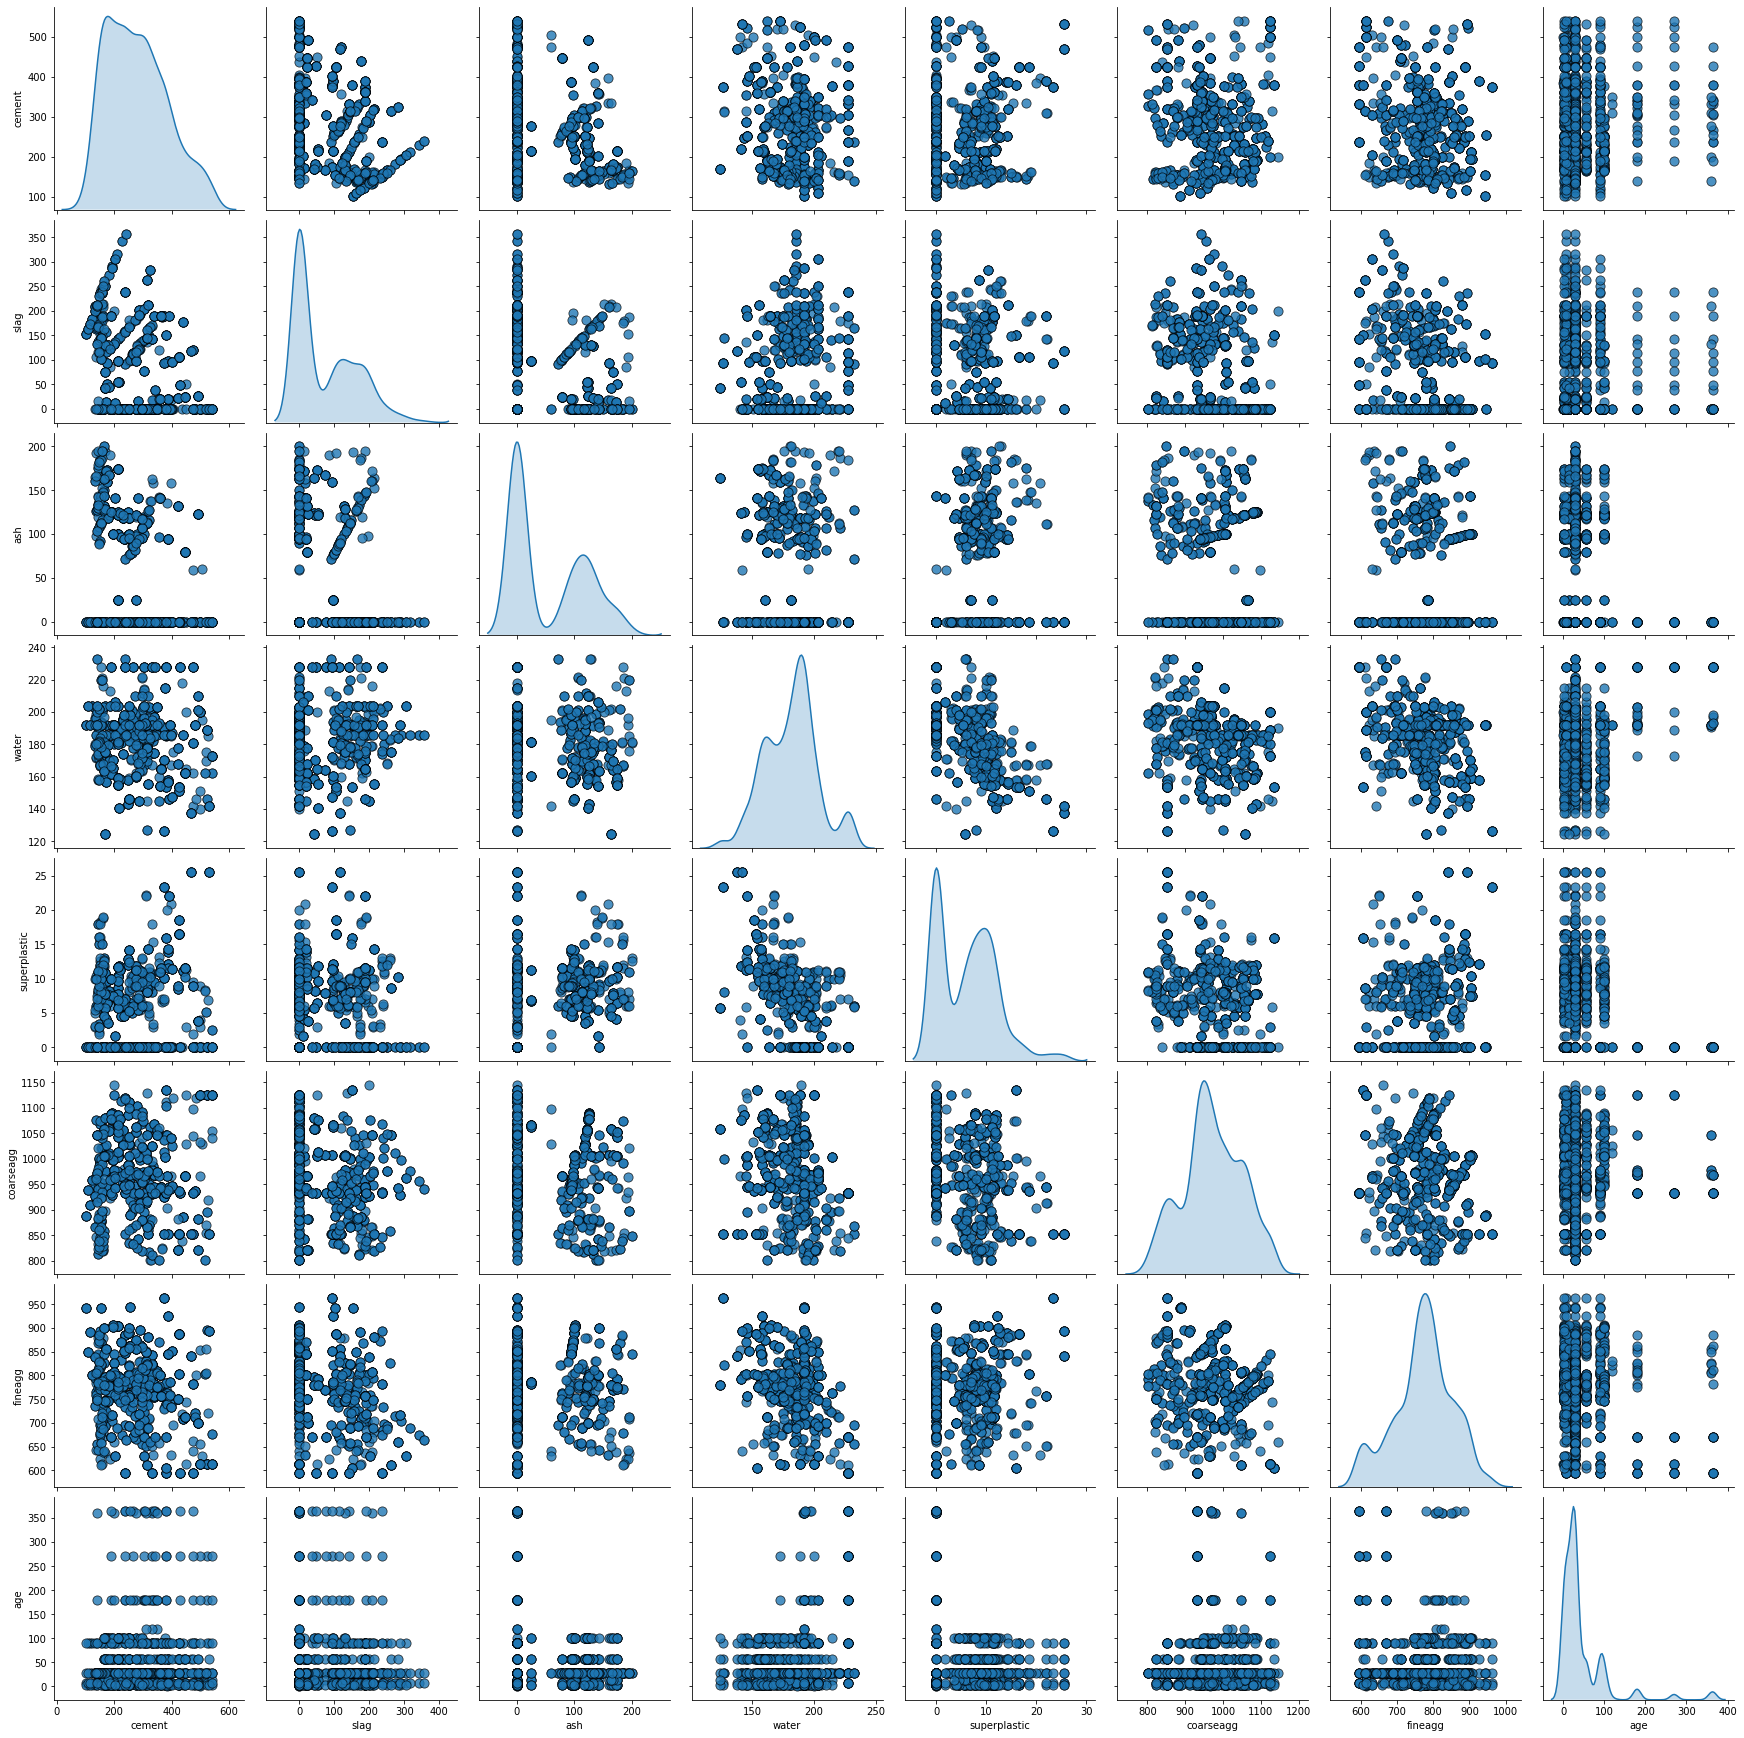

In [369]:
sns.pairplot(pdata, 
             vars = ['cement', 'slag', 'ash', 'water','superplastic','coarseagg','fineagg','age'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

In [370]:
# looking into slag, ash and superplastic, it seems to multiple clusters as gaussians differs
# Cement seems to be predominant factor to determine strength 

# let's check the feature importance

In [371]:
from sklearn.ensemble import RandomForestRegressor

In [372]:
X = pdata.drop(labels="strength", axis=1)
y= pdata["strength"]

In [373]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

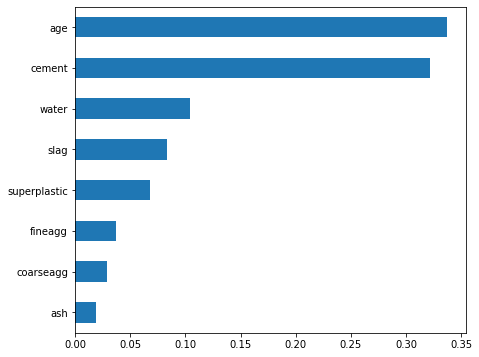

In [374]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6));

In [375]:
#cement and age seems to the important features to predict strength

In [376]:
# For this project let's include Random Forest Regressor and LinarRegression

In [377]:
# Split the data into train (60%) and test (20%) and validation (20%)

In [378]:
pdata.sample(frac=1)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
987,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28,28.24
273,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
663,387.0,20.0,94.0,157.0,14.3,938.0,845.0,7,36.84
1011,313.0,0.0,0.0,178.0,8.0,1000.0,822.0,28,25.10
723,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,56,53.46
...,...,...,...,...,...,...,...,...,...
653,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,100,66.95
745,290.4,0.0,96.2,168.1,9.4,961.2,865.0,100,48.97
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
136,166.8,250.2,0.0,203.5,0.0,975.6,692.6,90,43.57


In [379]:
train, validate, test = np.split(pdata.sample(frac=1), [int(.6*len(pdata)), int(.8*len(pdata))])

In [380]:
X_train = train.drop(labels="strength", axis=1)
y_train= train["strength"]

In [381]:
X_test = test.drop(labels="strength", axis=1)
y_test= test["strength"]

In [382]:
X_validation = validate.drop(labels="strength", axis=1)
y_validation= validate["strength"]

# Let's try Random Forest Regressor 

In [383]:
modelRF = RandomForestRegressor(random_state = 39)
modelRF.fit(X_train, y_train)

RandomForestRegressor(random_state=39)

In [384]:
y_pred_RF = modelRF.predict(X_test)

In [385]:
from sklearn.metrics import r2_score,mean_squared_error

In [386]:
R2_RF = r2_score(y_test, y_pred_RF)
print("R2 Score for Random Forest Regressor: {0:.4f}".format(R2_RF))

R2 Score for Random Forest Regressor: 0.8642


In [387]:
RMSE_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_RF))

RMSE for Random Forest Regressor: 6.1435


In [388]:
print('Parameters currently in use for RandomForest:\n')
print(modelRF.get_params())

Parameters currently in use for RandomForest:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 39, 'verbose': 0, 'warm_start': False}


In [389]:
# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

# GridSearch for best parameters

In [390]:
from sklearn.model_selection import GridSearchCV

In [391]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [392]:
grid_search.fit(X_validation, y_validation)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.6min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [393]:
best_grid = grid_search.best_estimator_
y_pred_RF_tuned = best_grid.predict(X_test)

In [394]:
R2_RF_tuned = r2_score(y_test, y_pred_RFTuned)
print("R2 Score for Random Forest Regressor after hyperparameter tuning using GridSearchCV: {0:.4f}".format(R2_RandomForest_tuned))

R2 Score for Random Forest Regressor after hyperparameter tuning using GridSearchCV: 0.8903


In [395]:
RMSE_RF_tuned = np.sqrt(mean_squared_error(y_test, y_pred_RFTuned))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_RF_tuned))

RMSE for Random Forest Regressor: 22.6518


# Let's try Linear Regression

In [396]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

In [397]:
# Let's scale the data for linear regression

In [398]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
X_validation_scaled = X_validation.apply(zscore)

In [399]:
modelLR = LinearRegression() 
modelLR.fit(X_train_scaled, y_train) 

LinearRegression()

In [400]:
y_pred_LR = modelLR.predict(X_test_scaled)

In [401]:
R2_LR = r2_score(y_test, y_pred_LR)
print("R2 Score for Linear Regression: {0:.4f}".format(R2_LR))

R2 Score for Linear Regression: 0.5263


In [402]:
RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_LR))

RMSE for Random Forest Regressor: 11.4749


In [403]:
coef_df = pd.DataFrame(modelLR.coef_, columns=["Coefficient"])
coef_df['intercept'] = modelLR.intercept_
print(coef_df)

   Coefficient  intercept
0    12.095870  36.017508
1     9.227453  36.017508
2     5.271536  36.017508
3    -2.426435  36.017508
4     2.632503  36.017508
5     1.401275  36.017508
6     2.426259  36.017508
7     7.528218  36.017508


In [404]:
# Let's try Ridge regression (L1 regularization)

In [405]:
from sklearn.linear_model import Ridge

In [406]:
ridge = Ridge(alpha=1).fit(X_train_scaled, y_train)

In [407]:
y_pred_LRRidge = ridge.predict(X_test_scaled)

In [408]:
R2_Ridge = r2_score(y_test, y_pred_LRRidge)
print("R2 Score for Ridge Linear Regression: {0:.4f}".format(R2_Ridge))

R2 Score for Ridge Linear Regression: 0.5275


In [409]:
RMSE_Ridge = np.sqrt(mean_squared_error(y_test, y_pred_LRRidge))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_Ridge))

RMSE for Random Forest Regressor: 11.4602


In [410]:
# performance is not improved using Ridge

# Implement GridSearchCV on Ridge

In [411]:
alpha = [0.0001,0.001, 0.01, 0.1, 1, 10]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params:  {'alpha': 0.0001}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [412]:
best_grid_Ridge = grid.best_estimator_
y_pred_Ridge_tuned = best_grid_Ridge.predict(X_test_scaled)

In [413]:
R2_Ridge_tuned = r2_score(y_test, y_pred_Ridge_tuned)
print("R2 Score for Ridge Regressor after hyperparameter tuning using GridSearchCV: {0:.4f}".format(R2_Ridge_tuned))

R2 Score for Ridge Regressor after hyperparameter tuning using GridSearchCV: 0.5263


In [414]:
RMSE_Ridge_tuned = np.sqrt(mean_squared_error(y_test, y_pred_Ridge_tuned))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_Ridge_tuned))

RMSE for Random Forest Regressor: 11.4749


# Let's try SVM regressor with RBF kernel

In [415]:
from sklearn.svm import SVR

In [416]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train_scaled,y_train)

SVR()

In [417]:
y_pred_SVR = regressor.predict(X_test_scaled)

In [418]:
R2_SVR = r2_score(y_test, y_pred_SVR)
print("R2 Score for Ridge Linear Regression: {0:.4f}".format(R2_SVR))

R2 Score for Ridge Linear Regression: 0.5493


In [419]:
RMSE_SVR = np.sqrt(mean_squared_error(y_test, y_pred_SVR))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_SVR))

RMSE for Random Forest Regressor: 11.1929


# Let's try Polynomial Regression

In [420]:
from sklearn.preprocessing import PolynomialFeatures

In [421]:
poly = PolynomialFeatures(degree = 3)

In [422]:
X_poly_train = poly.fit_transform(X_train)

In [423]:
lin2 = LinearRegression() 
lin2.fit(X_poly_train, y_train)

LinearRegression()

In [424]:
X_poly_test = poly.fit_transform(X_test)

In [425]:
y_pred_LRPoly = lin2.predict(X_poly_test)

In [426]:
R2_LR_POLY = r2_score(y_test, y_pred_LRPoly)
print("R2 Score for Polynomial Regression: {0:.4f}".format(R2_LR_POLY))

R2 Score for Polynomial Regression: 0.8049


In [427]:
RMSE_LR_POLY = np.sqrt(mean_squared_error(y_test, y_pred_LRPoly))
print("RMSE for Random Forest Regressor: {0:.4f}".format(RMSE_LR_POLY))

RMSE for Random Forest Regressor: 7.3643


In [428]:
# Using Polynomial regression the score improved 

# p_value test for feature selection

In [429]:
from sklearn.feature_selection import f_regression

In [430]:
F, pval = f_regression(X_train_scaled, y_train)

In [431]:
print(pval)

[1.13106506e-36 1.72575727e-04 1.15018479e-03 2.88948478e-11
 1.66025823e-22 1.24131997e-06 3.02017742e-04 4.10655744e-20]


In [432]:
# pvalues for all columns seems less than 0.05. So all independent variables are contributing to the prediction

# Summary

In [433]:
data = np.array([R2_RF,R2_LR,R2_Ridge,R2_SVR,R2_LR_POLY]).T
df = pd.DataFrame(data, index=["RandomForest Regressor","Linear Regression","Ridge Linear Regression","SupportVector Regressor","Polynomial Regression"], 
                  columns=["R2 Score"])
df["RMSE"] = np.array([RMSE_RF,RMSE_LR,RMSE_Ridge, RMSE_SVR,RMSE_LR_POLY]).T
df

,R2 Score,RMSE
RandomForest Regressor,0.864221,6.143464
Linear Regression,0.526301,11.474875
Ridge Linear Regression,0.527513,11.460195
SupportVector Regressor,0.549296,11.192899
Polynomial Regression,0.804896,7.364270


In [434]:
# Best model is Random Forest Regressor, even the polynomial regression performed well

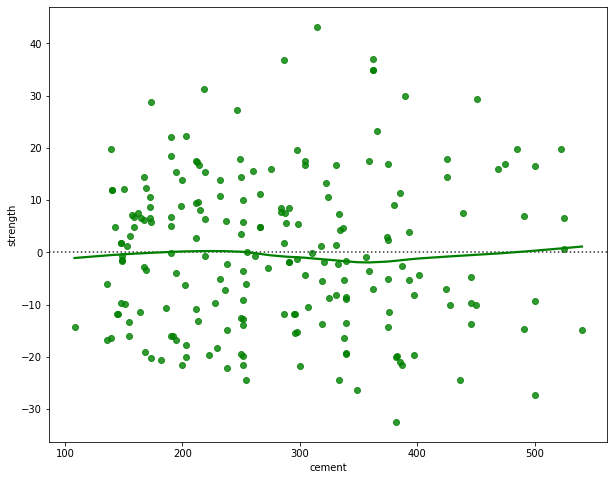

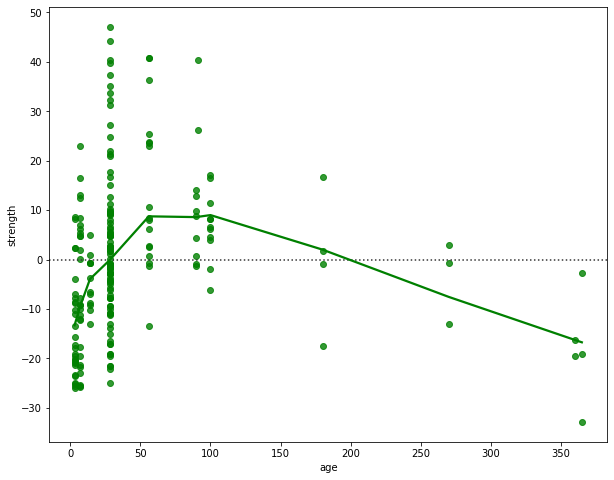

In [435]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['age'], y= y_test, color='green', lowess=True )

In [436]:
#Using Statsmodel library to get adjusted R2

In [437]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1001,233.8,0.0,94.6,197.9,4.6,947.0,852.2,28,22.84
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
738,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
355,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,28,52.50
111,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,7,12.05


In [438]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -38.117101
cement           0.116252
slag             0.106629
ash              0.083774
water           -0.111630
superplastic     0.460965
coarseagg        0.018256
fineagg          0.029839
age              0.118510
dtype: float64

In [439]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     125.6
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          1.54e-123
Time:                        20:43:05   Log-Likelihood:                -2303.6
No. Observations:                 618   AIC:                             4625.
Df Residuals:                     609   BIC:                             4665.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -38.1171     33.940     -1.123   

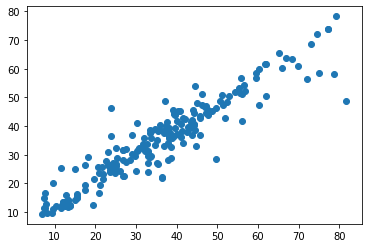

In [440]:
plt.scatter(y_test, y_pred_RF)

# Model performance at 95% confidence interval

In [441]:
values = data_train.values

In [443]:
from sklearn.utils import resample

In [449]:
# configure bootstrap
n_iterations = 500              # Number of bootstrap samples to create
n_size = int(len(data_train) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    modelRF.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = modelRF.predict(test[:,:-1])
    R2_score = r2_score(test[:,-1], predictions)
    print(R2_score)
    stats.append(R2_score)

0.8605800361218312
0.8381241208503024
0.8484696123422173
0.8216940153219623
0.832987964738014
0.8195243973108189
0.7559806787217762
0.8427363014644937
0.8253579600254393
0.8382282914551531
0.8261165656907123
0.8334851950092025
0.8307978078796171
0.8386479240317054
0.7981501972388185
0.8222298277890372
0.8245534595397735
0.8096330888635777
0.8211670487780354
0.7999053282252369
0.8249410815445416
0.8171401058297523
0.852190787400564
0.8122086624271669
0.8137232304085161
0.8163462310215583
0.8506765949842653
0.794431496967001
0.8190354050900869
0.8096887857703097
0.8134461893558143
0.8034394751594005
0.8117978561754224
0.7894040353318779
0.8350408261595501
0.7775610635310832
0.8013503553572215
0.8084334218631273
0.8283733408996632
0.8466885961317778
0.7881812097526566
0.8229924086335194
0.8248115217976447
0.8191695173983411
0.8225517340920065
0.8341730485660119
0.8101028032620785
0.8570919623759788
0.7118472603728533
0.8248775111304655
0.8340861071121655
0.8383535936054466
0.8508232817931

0.7440653581895562
0.8284265952922871
0.8389155286596219
0.8212350579935136
0.8449272155557774
0.8062309708484912
0.8368670882441238
0.8294272654668168
0.7837063481049038
0.8386704346895542
0.8095995572940989
0.8258055752172241
0.8394882443372126
0.8169435622722553
0.8559822575127811
0.7979657891036144
0.8291523804019024
0.8570476218959096
0.7914846751750804
0.8091640691578044
0.826018666288512
0.8425295155948147
0.8162345772136264
0.7861257672511949
0.8108525752515924
0.7973189334057456
0.7602646702418009
0.8260164235967019
0.8458101539395129
0.8149614098970941
0.8330774603577908
0.8275347464046119
0.8060262697954061
0.8226188131371776
0.7996473081884581
0.7935892657896763
0.7844765694691692
0.8385622526219881
0.8151035461130485
0.8044861014270545
0.8239037847527908
0.8223266698853796
0.8342972782030077
0.820042763341039
0.783954892689691
0.8070402135696528
0.8255007399633535
0.8317088864302435
0.8230036683709556
0.8165848536381833
0.8412621812611404
0.8034647343175971
0.8350025470256

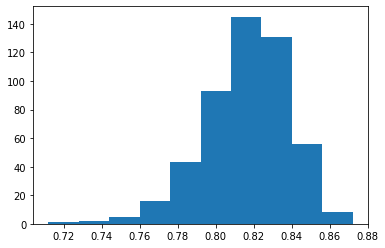

95.0 confidence interval 76.6% and 85.3%


In [451]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))